In [285]:
import pandas as pd 
import matplotlib as plt
import scipy.stats as sts
import matplotlib.pyplot as plt 
import numpy as np
import csv

# Load in the csv
wildfire_data = "../data_files/California_Fire_Incidents.csv"

In [286]:
# Read the wildfire csv and display
fire_data = pd.read_csv(wildfire_data)

fire_data.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [287]:
wildfire_df = fire_data[['ArchiveYear', 'Counties', 'AcresBurned']]
wildfire_df.head()

,ArchiveYear,Counties,AcresBurned
0,2013,Tuolumne,257314.0
1,2013,Los Angeles,30274.0
2,2013,Riverside,27531.0
3,2013,Placer,27440.0
4,2013,Ventura,24251.0


In [288]:
# Create data frame from csv data

fireyear = final_fire_data['ArchiveYear']
acres = final_fire_data['AcresBurned']
county = final_fire_data['Counties']

wildfire_df = pd.DataFrame({
    'Year' : fireyear,
    'County' : county,
    'Acres Burned' : acres
})

wildfire_df

,Year,County,Acres Burned
0,2013,Tuolumne,257314.0
1,2013,Los Angeles,30274.0
2,2013,Riverside,27531.0
3,2013,Placer,27440.0
4,2013,Ventura,24251.0
...,...,...,...
1631,2019,Riverside,9.0
1632,2019,Nevada,2.0
1633,2019,Yolo,NaN
1634,2019,San Diego,NaN


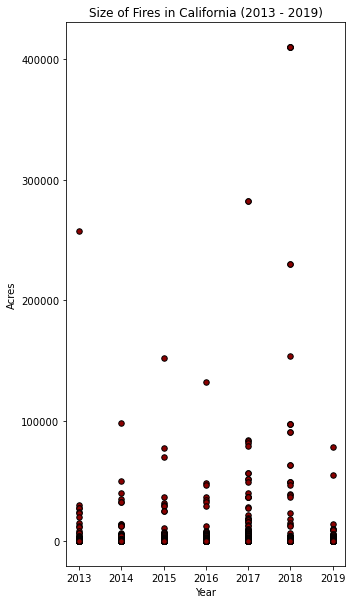

In [289]:
x = wildfire_df['Year']
y = wildfire_df['Acres Burned']

plt.figure(figsize = (5, 10))
plt.title("Size of Fires in California (2013 - 2019)")
plt.xlabel("Year")
plt.ylabel('Acres')

fire_plot = plt.scatter(x, y, marker = 'o', color = 'darkred', edgecolors = 'black', s = 30)

plt.savefig('../data_files/fire_sizes.png')
plt.show()

In [290]:
# Create csv to generate pivot table and pull values for statistical analysis

# wildfire_df.to_csv('../data_files/wildfire.csv', index = False)

In [291]:
year_fire = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
sum_acres = [527745, 448715, 574503, 505927, 1793915, 3358049, 285708]

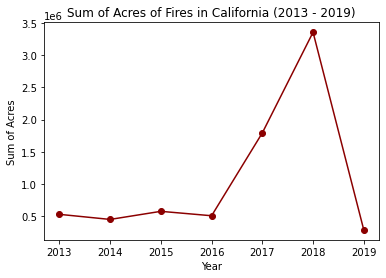

In [292]:
plt.title("Sum of Acres of Fires in California (2013 - 2019)")
plt.xlabel("Year")
plt.ylabel("Sum of Acres")

plt.plot(year_fire, sum_acres, marker = 'o', color = 'darkred')
plt.savefig('../data_files/sum_acres.png')
plt.show()

In [293]:
fire_filtered = fire_df.groupby(['Year', 'County']).sum()

fire_filtered = pd.DataFrame(fire_filtered)
fire_filtered

Acres Burned
Year County                 
2013 Alameda           478.0
     Amador             96.0
     Butte            3459.0
     Calaveras          77.0
     Colusa             28.0
...                      ...
2019 Tulare           1654.0
     Tuolumne          104.0
     Ventura         12506.0
     Yolo             2545.0
     Yuba              268.0

[333 rows x 1 columns]

In [294]:
census_csv = '../data_files/drought_census_2013_2019.csv'

census_data = pd.read_csv(census_csv)

census_data.head()

,Unnamed: 0,Year,County,Unnamed: 3,D0,D1,D2,D3,D4,Unnamed: 9,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,232,2013,Alameda County,13.070577,86.929423,65.384615,51.923077,0.797308,0.0,46,1535248,36.8,72112,35763,188501,12.278212
1,233,2013,Alpine County,12.923654,87.076346,69.559423,48.655000,4.884231,0.0,5,1165,44.3,58636,25527,184,15.793991
2,234,2013,Amador County,16.524808,83.475192,65.408462,51.923077,11.498077,0.0,29,37422,49.1,53684,27347,4150,11.089733
3,235,2013,Butte County,15.985962,84.014038,65.384615,51.923077,0.000000,0.0,21,220542,37.0,43752,23787,43942,19.924550
4,236,2013,Calaveras County,14.062500,85.937500,69.140769,53.212500,11.538462,0.0,26,45147,50.0,55295,29329,4849,10.740470


In [295]:
# Create data frame from csv census

census_year = census_data['Year']
census_county = census_data['County']
census_poverty = census_data['Poverty Rate']

census_df = pd.DataFrame({
    'Year' : census_year,
    'County' : census_county,
    'Poverty Rate' : census_poverty
})

census_df.head()

,Year,County,Poverty Rate
0,2013,Alameda County,12.278212
1,2013,Alpine County,15.793991
2,2013,Amador County,11.089733
3,2013,Butte County,19.924550
4,2013,Calaveras County,10.740470


In [296]:
# Remove the word 'County' from the County column

county_list = census_df.County.tolist()

In [297]:
county_list = [x.rstrip('County') for x in county_list]


In [298]:
census_df.County = county_list
census_df.head()

,Year,County,Poverty Rate
0,2013,Alameda,12.278212
1,2013,Alpine,15.793991
2,2013,Amador,11.089733
3,2013,Butte,19.924550
4,2013,Calaveras,10.740470


In [299]:
# Create csv to generate pivot table and pull values for statistical analysis

# census_df.to_csv('../data_files/census_poverty_rate_pivot.csv', index = False)

In [300]:
year = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
rate = [15.86, 16.18, 16.10, 15.70, 15.23, 14.55, 14.00]

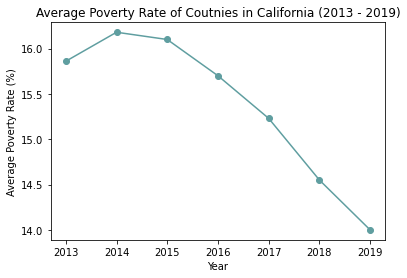

In [301]:
plt.title("Average Poverty Rate of Coutnies in California (2013 - 2019)")
plt.xlabel("Year")
plt.ylabel("Average Poverty Rate (%)")

plt.plot(year, rate, marker = 'o', color = 'cadetblue')
plt.savefig('../data_files/poverty_rate.png')
plt.show()

In [302]:
census_filtered = census_df.groupby(['Year', 'County']).sum()

census_filtered = pd.DataFrame(census_filtered)
census_filtered

Poverty Rate
Year County                  
2013 Alameda        12.278212
     Alpine         15.793991
     Amador         11.089733
     Butte          19.924550
     Calaveras      10.740470
...                       ...
2019 Tulare         46.985265
     Tuolumne       23.843094
     Ventura        17.620267
     Yolo           36.732121
     Yuba           30.309062

[406 rows x 1 columns]

In [303]:
# Merge two data frames

merged_df = pd.merge(fire_df, census_df, how = 'outer', on = ['Year', 'County'])
merged_df.dropna()
merged_df.head()

,Year,Acres Burned,County,Poverty Rate
0,2013,257314.0,Tuolumne,NaN
1,2013,1070.0,Tuolumne,NaN
2,2013,100.0,Tuolumne,NaN
3,2013,30274.0,Los Angeles,NaN
4,2013,712.0,Los Angeles,NaN
